In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

1 จากตัวอย่างที่ 10.4 (ชุดข้อมูล 'cosmetic.csv') สัดส่วนการครองตลาด (%) และกำไรจ่ายคืนลูกค้า (%)มีความสัมพันธ์ในทิศทางเดียวกัน และมีแนวโน้มเป็นเส้นตรง

ให้นิสิตทำการ
-  สร้างสมการถดถอยหาค่า b0 และ b1 (y คือสัดส่วนการครองตลาด, x คือกำไรจ่ายคืนลูกค้า)
-  หากมีค่าสัดส่วนการตลาดเท่ากับ 70% จงคำนวณกำไรจ่ายคืนลูกค้าจากสมการที่ได้
-  ทดสอบว่าสัดส่วนการครองตลาดและกำไรจ่ายคืนลูกค้ามีความสัมพันธ์เชิงเส้นตรงที่ระดับนัยสำคัญ 0.01 พร้อมทั้งแสดงค่าสัมประสิทธิ์การตัดสินใจ

**หาค่า b0 และ b1**:  
  

In [ ]:
df = pd.read_csv("https://kasets.art/QdsyoF")
df.head()

,mk_share,payback_customer
0,15,24
1,14,20
2,18,25
3,20,28
4,10,15


จากสมการ $\hat{y}=b_0+b_1x$ เมื่อ   
y คือ สัดส่วนการครองตลาด(%)  
x คือ กำไรจ่ายคืนลูกค้า  

In [ ]:
x = df.payback_customer
y = df.mk_share
x_wconst = sm.add_constant(x)
lr = sm.OLS(y, x_wconst).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:               mk_share   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     35.31
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           6.79e-05
Time:                        11:41:25   Log-Likelihood:                -28.283
No. Observations:                  14   AIC:                             60.57
Df Residuals:                      12   BIC:                             61.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.4957      1.868  

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
b0 = lr.params['const'] #หรือ b0 = 4.4957 ตามตาราง
b1 = lr.params['payback_customer'] #หรือ b1 = 0.5500 ตามตาราง

In [ ]:
print(b0, b1)

4.495665878644603 0.5500394011032314


<font color='blue'>แสดงกราฟ:</font>

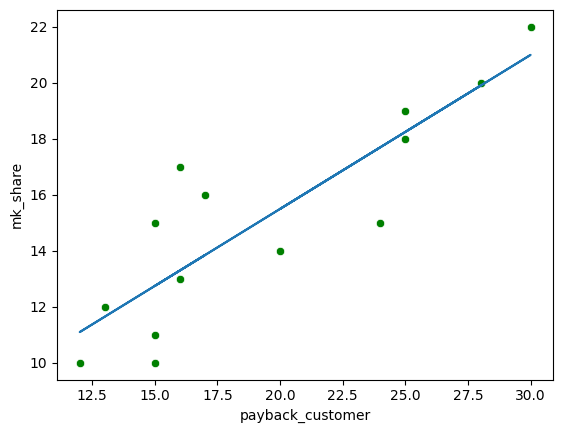

In [ ]:
y_hat = lr.predict(x_wconst)
sns.scatterplot(data=df, x='payback_customer', y='mk_share', color='g')
plt.plot(df.payback_customer, y_hat)

**เมื่อ y = 70, x=?**:  

In [ ]:
#70 = b0 + b1*x
x = (70-b0)/b1
x

119.09025787965606

**สมมติฐาน**:  
  

จากสมการ $y=𝛽_0+𝛽_1x+ϵ$ เมื่อ   
y คือ สัดส่วนการครองตลาด(%)  
x คือ กำไรจ่ายคืนลูกค้า  
จะได้ว่า

H0: $𝛽_1=0$ (สัดส่วนการครองตลาด(%)และกำไรจ่ายคืนลูกค้าไม่มีความสัมพันธ์เชิงเส้นตรง)  
H1: $𝛽_1\ne0$ (สัดส่วนการครองตลาด(%)และกำไรจ่ายคืนลูกค้ามีความสัมพันธ์เชิงเส้นตรง)

**ค่า F_cal**:  
  

In [ ]:
F_cal = lr.fvalue #หรือ F_cal = 35.31 ตามตาราง
F_cal

35.31111991573331

**หาค่า F_crit:**   

In [ ]:
F_crit = stats.f.isf(0.01,  dfn=1, dfd=12)
F_crit

9.330212103168536

**หาค่า p-val:**   

In [ ]:
p_val = lr.f_pvalue #หรือ p_val = 6.79e-05 ตามตาราง
p_val

6.793657739462244e-05

**สรุปผล:**   

- F_cal อยู่ในบริเวณวิกฤต
- p_val < 0.01   

ดังนั้นปฏิเสธ H0 ยอมรับ H1 𝛽1≠0  (สัดส่วนการครองตลาด(%)และกำไรจ่ายคืนลูกค้ามีความสัมพันธ์เชิงเส้นตรง)

**กราฟแจกแจงความน่าจะเป็น:**  

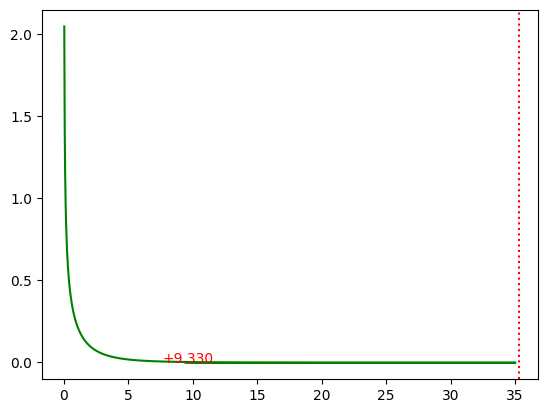

In [ ]:
x = np.linspace(0,35,1000)
y = [stats.f.pdf(v,dfn=1, dfd=12) for v in x]
F_critical_right = F_crit

plt.plot(x,y, color='g')
plt.fill_between(x[x>=F_critical_right],
                 stats.f.pdf(x[x>=F_critical_right],  dfn=1, dfd=12),
                 color='g'
                 )
plt.text(F_critical_right-1.7, 0, f"+{F_critical_right:.3f}", color='r')
plt.axvline(F_cal, ls=':', color='r')

**ค่า $r^2$:**   

In [ ]:
r2 = lr.rsquared #หรือ r2 = 0.746 ตามตาราง
r2

0.7463598405327665